<a href="https://colab.research.google.com/github/ISSQ1/KAUST_Stage2/blob/main/KAIAI24_Stage_2_Ex2_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms
import numpy as np
from IPython.display import clear_output

#Tasks
#1) Train a logistic regression model using numpy (PyTorch or any other framework is not allowed)
#2) Implement the softmax layer
#3) Implement the cross entropy loss
#4) plot the training loss
#5) Show the test Accuracy
#6) Show a few incorrectly labelled samples

In [ ]:
!wget https://pjreddie.com/media/files/mnist_train.csv.gz -P ../input

--2024-03-28 05:36:55--  https://pjreddie.com/media/files/mnist_train.csv.gz
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-28 05:36:55 ERROR 404: Not Found.



In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)


# Download test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

clear_output()

In [ ]:
print(trainset.data.shape)
print(trainset.targets.shape)
print("Number of classes: ", len(trainset.classes))

torch.Size([60000, 28, 28])
torch.Size([60000])
Number of classes:  10


In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

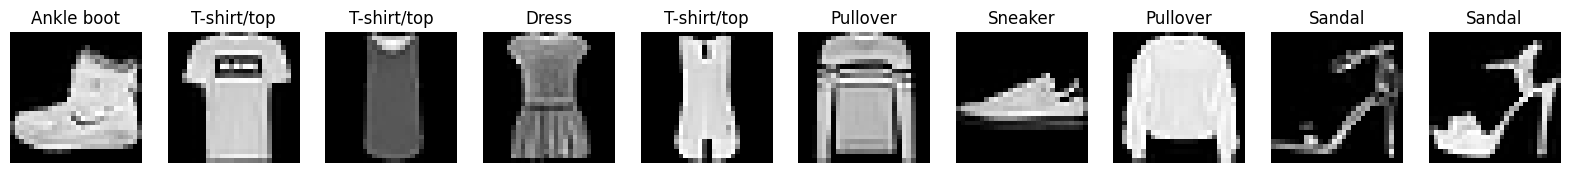

In [ ]:
images = []
labels = []

plt.figure(figsize=(20,20))

for i in range(10):
    images.append(trainset.data[i])
    labels.append(trainset.targets[i])
    plt.subplot(1,10,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(trainset.classes[labels[i].item()])
    plt.axis('off')
plt.show()

In [ ]:
class MultiClassLogisticRegression:

    def fit(self, X, y, epochs=10, learning_rate= 0.001): # Train the logistic regression model.
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        y=self.one_hot(y)

        self.loss = []


        col = np.ones((X.shape[0], 1))
        A = np.concatenate((col, X), axis=1)


        self.weights = np.random.randn(len(self.classes), A.shape[1])

        for i in range(epochs):

            if self.score_(A, y) > 0.79:
              break
            self.loss.append(self.cross_entropy(y, self.predict_(A)))


            pred_y = self.predict_(A)

            gradient = (pred_y - y).T.dot(A)


            self.weights -= gradient.dot(learning_rate)
            print(' Training Accuray at {} iterations is {}'.format(i+1, self.score_(A, y)))
        return self


    def predict(self, X): # Predict the class labels for input data.
        col = np.ones((X.shape[0], 1))
        X = np.concatenate((col, X), axis =1)
        return self.predict_(X)


    def accuracy(self, X, y): # Calculate the accuracy of the model on given data.
        predicted_classes = self.predict_classes(X)
        correct_predictions = np.sum(predicted_classes == y.numpy())
        total_samples = len(y)
        accuracy = correct_predictions / total_samples
        return accuracy


    def predict_(self, X): # Compute the raw scores for each class.
        z = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(z)


    def softmax(self, z): # Compute the softmax probabilities from raw scores.
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy(self, y, probs): # Compute the cross-entropy loss.
        epsilon = 1e-15
        clipped_probs = np.clip(probs, epsilon, 1 - epsilon)
        return (-1 / len(probs)) * (y * np.log(clipped_probs)).sum()


    def predict_classes(self, X): # Predict the class labels for input data.
        return np.argmax(self.predict(X), axis=1)

    def one_hot(self, y): # Convert class labels into one-hot encoded vectors.
        return np.eye(len(self.classes))[y.reshape(-1)]

    def score_(self, X, y): # Compute the accuracy score of the model.
        probs = self.predict_(X)
        return np.mean(np.argmax(probs, axis=1) == np.argmax(y, axis=1))

In [ ]:
# Reshape the training and test data into 2D arrays
X_train = trainset.data.numpy().reshape(trainset.data.shape[0], -1)
X_test = testset.data.numpy().reshape(testset.data.shape[0], -1)

In [ ]:
# epochs = 100
# # Initialize the model
# model = MultiClassLogisticRegression()

# # Train the model and track the training loss
# training_loss_history = []
# for epoch in range(epochs):
#     # Perform one epoch of training
#     model.fit(X_train, trainset.targets, epochs=1, learning_rate=1e-5)

#     # Append the training loss for the current epoch
#     training_loss_history.append(model.loss[-1])  # Get the loss from the last epoch

# # Plot the training loss
# plt.figure(figsize=(10, 5))
# plt.plot(training_loss_history, label='Training Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training Loss over Epochs')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# Initialize the model
model = MultiClassLogisticRegression()
model.fit(X_train, trainset.targets, epochs=100, learning_rate= 1e-5)

 Training Accuray at 1 iterations is 0.20685
 Training Accuray at 2 iterations is 0.2764666666666667
 Training Accuray at 3 iterations is 0.3086333333333333
 Training Accuray at 4 iterations is 0.22643333333333332
 Training Accuray at 5 iterations is 0.3010833333333333
 Training Accuray at 6 iterations is 0.23555
 Training Accuray at 7 iterations is 0.33621666666666666
 Training Accuray at 8 iterations is 0.31998333333333334
 Training Accuray at 9 iterations is 0.28276666666666667
 Training Accuray at 10 iterations is 0.3656333333333333
 Training Accuray at 11 iterations is 0.45153333333333334
 Training Accuray at 12 iterations is 0.4978
 Training Accuray at 13 iterations is 0.47963333333333336
 Training Accuray at 14 iterations is 0.5143333333333333
 Training Accuray at 15 iterations is 0.4495
 Training Accuray at 16 iterations is 0.4828
 Training Accuray at 17 iterations is 0.48836666666666667
 Training Accuray at 18 iterations is 0.5908666666666667
 Training Accuray at 19 iterations

In [ ]:
accuracy_train = model.accuracy(torch.tensor(X_train), trainset.targets)
print("Training Accuracy: {}".format(accuracy_train))

Training Accuracy: 0.7635833333333333


In [ ]:
accuracy_test = model.accuracy(torch.tensor(X_test), testset.targets)
print(f"Test Accuracy: {accuracy_test}")

Test Accuracy: 0.7548


In [ ]:
model.loss

[32.74856793549262,
 27.393809459552678,
 24.98903379248683,
 23.87878506519408,
 26.718058601780747,
 24.139294929551962,
 26.402909162661892,
 22.926264124668464,
 23.486256862900845,
 24.772361722976456,
 21.90959045045204,
 18.942581216422663,
 17.34500120432749,
 17.971254503867836,
 16.77387195370956,
 19.011370868837382,
 17.862898442136423,
 17.67118930186419,
 14.130602715817965,
 11.27806183385061,
 12.001091886290848,
 11.347039919162066,
 11.82279829707799,
 12.782173331648327,
 14.389692377569682,
 11.597791369709794,
 12.235324594688818,
 11.671362310398461,
 11.627869562068332,
 11.416125710920559,
 13.271940373217376,
 10.555903645192387,
 11.608069842143728,
 12.26874902174616,
 13.594947019369746,
 11.80414193279303,
 12.203812062018258,
 11.197960043647651,
 11.021522942450277,
 9.463071063631272,
 10.814757124007754,
 11.851376181962614,
 10.140810165063305,
 11.770894992801235,
 9.831960374832786,
 10.084347119154247,
 9.399179860753895,
 10.190987781276947,
 11.41

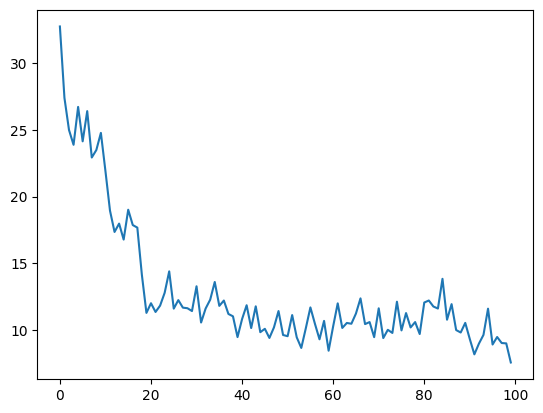

In [ ]:
plt.plot(model.loss)

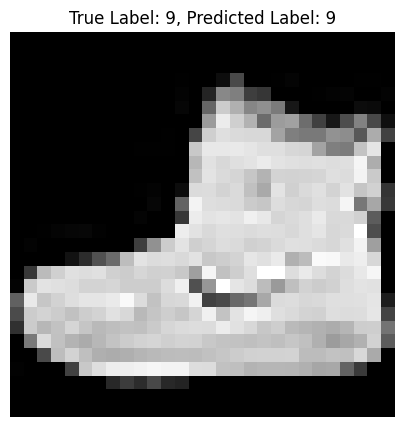

In [ ]:
# After training, predict labels for the training set
predicted_labels = model.predict_classes(torch.tensor(X_train))

# Find indices of incorrectly labeled samples
incorrect_indices = np.nonzero(predicted_labels != trainset.targets)[0]

# Visualize a few incorrectly labeled samples
num_samples_to_visualize = min(5, len(incorrect_indices))  # Ensure not to select more samples than available
selected_indices = np.random.choice(incorrect_indices, num_samples_to_visualize, replace=False)

plt.figure(figsize=(15, 5))
for i, index in enumerate(selected_indices):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f'True Label: {trainset.targets[index]}, Predicted Label: {predicted_labels[index]}')
    plt.axis('off')
plt.show()


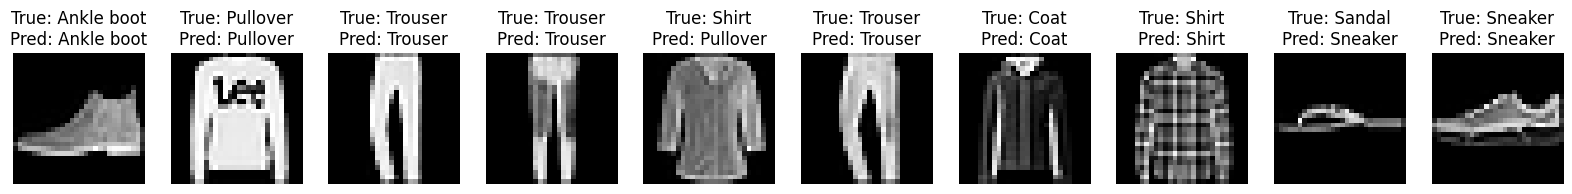

In [ ]:
images = []
labels = []
predictions = []

plt.figure(figsize=(20, 20))

for i in range(10):
    image = testset.data[i].numpy().reshape(-1)  # Convert PyTorch tensor to NumPy array and flatten
    label = testset.targets[i].item()
    predicted_label = model.predict_classes(image.reshape(1, -1))[0]

    images.append(image)
    labels.append(label)
    predictions.append(predicted_label)

    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {trainset.classes[labels[i]]}\nPred: {trainset.classes[predictions[i]]}")
    plt.axis('off')

plt.show()